Now that we know which models are performing better, it's time to perform cross validation and tune hyperparameters.
- Do a google search for hyperparameter ranges for each type of model.

GridSearch/RandomSearch are a great methods for checking off both of these tasks.
- BUT we have a problem - if we calculated a numerical value to encode city (such as the mean of sale prices in that city) on the training data, we can't cross validate 
- The rows in each validation fold were part of the original calculation of the mean for that city - that means we're leaking information!
- While sklearn's built in functions are extremely useful, sometimes it is necessary to do things ourselves

You need to create two functions to replicate what Gridsearch does under the hood

**`custom_cross_validation()`**
- Should take the training data, and divide it into multiple train/validation splits. 
- Look into `sklearn.model_selection.KFold` to accomplish this - the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) shows how to split a dataframe and loop through the indexes of your split data. 
- Within your function, you should compute the city means on the training folds just like you did in Notebook 1 - you may have to re-join the city column to do this - and then join these values to the validation fold

**`hyperparameter_search()`**
- Should take the validation and training splits from your previous function, along with your dictionary of hyperparameter values
- For each set of hyperparameter values, fit your chosen model on each set of training folds, and take the average of your chosen scoring metric. [itertools.product()](https://docs.python.org/3/library/itertools.html) will be helpful for looping through all combinations of hyperparameter values
- Your function should output the hyperparameter values corresponding the highest average score across all folds. Alternatively, it could also output a model object fit on the full training dataset with these parameters.

Docstrings have been provided below to get you started. Once you're done developing your functions, you should move them to `functions_variables.py` to keep your notebook clean 

Bear in mind that these instructions are just one way to tackle this problem - the inputs and output formats don't need to be exactly as specified here.

In [93]:
#Imports 
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from functions_variables import *

import joblib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [94]:
%load_ext autoreload
%autoreload 2

The cross validation and hyperparameter tuning functions are in the 'functions_variables.py' notebook. RMSE is being used as the score during hyperparameter tuning. 

### Encoded Data steps (not used right now)

In [16]:
# X = pd.read_csv('../data/dataframes/X_train_encoded.csv')
# y = pd.read_csv('../data/dataframes/Y_train_encoded.csv')

In [17]:
# X.drop(columns=['permalink', 'listing', 'primary_photo', 'state', 'postal_code', 'sold_date'], inplace=True)

In [18]:
# X['city'] = X['city'].astype('category')

In [22]:
# X.to_csv('../data/dataframes/X_encoded_final.csv', index=False)

In [20]:
# #Split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# print('X_train shape:', X_train.shape)
# print('Y_val shape:', y_val.shape)

X_train shape: (2563, 24)
Y_val shape: (641, 1)


In [23]:
# X_train.to_csv('../data/dataframes/X_train_encoded_final.csv', index=False)
# X_val.to_csv('../data/dataframes/X_val_encoded_final.csv', index=False)
# y_train.to_csv('../data/dataframes/y_train_encoded_final.csv', index=False)
# y_val.to_csv('../data/dataframes/y_val_encoded_final.csv', index=False)

In [ ]:
# #training data 
# training_data = pd.concat([X_train, y_train], axis=1)
# #Cross validation 
# training_folds, validation_folds = custom_cross_validation(training_data, n_splits=5)

The part above is just to show the previous work done with the encoded data. As the activity was later marked stretch, we decided to use the non-encoded data (shown below)

### Steps for Hyperparameter Tuning

In [90]:
#no city data 
X_train_no_city = pd.read_csv('../data/dataframes/X_train_final2.csv')
X_val_no_city = pd.read_csv('../data/dataframes/X_val_final.csv')
Y_train_no_city = pd.read_csv('../data/dataframes/Y_train_final.csv')
Y_val_no_city = pd.read_csv('../data/dataframes/Y_val_final.csv')

In [91]:
#training data 
training_data_no_city = pd.concat([X_train_no_city, Y_train_no_city], axis=1)
#Cross validation 
training_folds_no_city, validation_folds_no_city = custom_cross_validation_no_city(training_data_no_city, n_splits=5)

In [27]:
# param_grid = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# #Decision tree
# best_hyperparameters_dt, best_score_dt = hyperparameter_search(training_folds, validation_folds, param_grid, 'DecisionTree')
# print('Best hyperparameters for Decision Tree:', best_hyperparameters_dt)
# print('Best score for Decision Tree:', best_score_dt)

Best hyperparameters for Decision Tree: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 20368179294.73431


In [95]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

#Decision tree
best_hyperparameters_dt_no_city, best_score_dt_no_city = hyperparameter_search(training_folds_no_city, validation_folds_no_city, param_grid, 'DecisionTree')
print('Best hyperparameters for Decision Tree:', best_hyperparameters_dt_no_city)
print('Best score for Decision Tree:', best_score_dt_no_city)

Best hyperparameters for Decision Tree: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 10973318169.419563


In [44]:
# #XGBoost
# param_grid = {
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'n_estimators': [100, 200, 300, 400]
# }

# best_hyperparameters_xgb, best_score_xgb = hyperparameter_search(training_folds, validation_folds, param_grid, 'XGBoost')
# print('Best hyperparameters for XGBoost:', best_hyperparameters_xgb)
# print('Best score for XGBoost:', best_score_xgb)

In [96]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300, 400]
}

best_hyperparameters_xgb_no_city, best_score_xgb_no_city = hyperparameter_search(training_folds_no_city, validation_folds_no_city, param_grid, 'XGBoost')
print('Best hyperparameters for XGBoost:', best_hyperparameters_xgb_no_city)
print('Best score for XGBoost:', best_score_xgb_no_city)

Best hyperparameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 400}
Best score for XGBoost: 10184566449.964846


In [34]:
# #Random forest
# param_grid = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# best_hyperparameters_rf, best_score_rf = hyperparameter_search(training_folds, validation_folds, param_grid, 'RandomForest')
# print('Best hyperparameters for Random Forest:', best_hyperparameters_rf)
# print('Best score for Random Forest:', best_score_rf)


Best hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Random Forest: 17466004926.885338


In [97]:
#Random forest
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

best_hyperparameters_rf_no_city, best_score_rf_no_city = hyperparameter_search(training_folds_no_city, validation_folds_no_city, param_grid, 'RandomForest')
print('Best hyperparameters for Random Forest:', best_hyperparameters_rf_no_city)
print('Best score for Random Forest:', best_score_rf_no_city)

Best hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Random Forest: 7009546023.616539


Hyperparameter tuning is the process of finding the optimal hyperparameters for a machine learning model. The goal is to optimize the predictions from the model by minimizing a predefined loss function.

We've performed hyperparameter tuning for three models: Decision Tree, XGBoost, and Random Forest. The hyperparameters you've tuned and the best values found are:

Decision Tree:

'max_depth': None (meaning the tree can grow as deep as necessary)
'max_features': 'sqrt' (the number of features to consider when looking for the best split is the square root of the total number of features)
'min_samples_leaf': 1 (the minimum number of samples required to be at a leaf node)
'min_samples_split': 2 (the minimum number of samples required to split an internal node)

XGBoost:

'learning_rate': 0.3 (shrinkage parameter applied to each tree in the boosting process)
'max_depth': 5 (maximum depth of a tree)
'n_estimators': 400 (the number of gradient boosted trees)

Random Forest:

'max_depth': None (trees can grow as deep as necessary)
'max_features': 'sqrt' (the number of features to consider when looking for the best split is the square root of the total number of features)
'min_samples_leaf': 1 (the minimum number of samples required to be at a leaf node)
'min_samples_split': 2 (the minimum number of samples required to split an internal node)

Lower scores are better, so according to these results, the Random Forest model with the given hyperparameters performed the best out of the three models.

We want to make sure that we save our models.  In the old days, one just simply pickled (serialized) the model.  Now, however, certain model types have their own save format.  If the model is from sklearn, it can be pickled, if it's xgboost, for example, the newest format to save it in is JSON, but it can also be pickled.  It's a good idea to stay with the most current methods. 
- you may want to create a new `models/` subdirectory in your repo to stay organized

In [35]:
# save your best model here
final_model_dt = DecisionTreeRegressor(**best_hyperparameters_dt, random_state=42)
final_model_dt.fit(X_train, y_train)

#save
joblib.dump(final_model_dt, '../models/final_model_dt.pkl')

['../models/final_model_dt.pkl']

In [47]:
#save best model no city 
final_model_dt_no_city = DecisionTreeRegressor(**best_hyperparameters_dt_no_city, random_state=42)
final_model_dt_no_city.fit(X_train_no_city, Y_train_no_city)

#save
joblib.dump(final_model_dt_no_city, '../models/final_model_dt_no_city.pkl')

['../models/final_model_dt_no_city.pkl']

In [48]:
#save best model no city
final_model_xgb_no_city = XGBRegressor(**best_hyperparameters_xgb_no_city, random_state=42)
final_model_xgb_no_city.fit(X_train_no_city, Y_train_no_city)

#save
joblib.dump(final_model_xgb_no_city, '../models/final_model_xgb_no_city.pkl')

['../models/final_model_xgb_no_city.pkl']

In [49]:
#save best model no city
final_model_rf_no_city = RandomForestRegressor(**best_hyperparameters_rf_no_city, random_state=42)
final_model_rf_no_city.fit(X_train_no_city, Y_train_no_city)

#save
joblib.dump(final_model_rf_no_city, '../models/final_model_rf_no_city.pkl')

['../models/final_model_rf_no_city.pkl']

In [36]:
#save
final_model_rf = RandomForestRegressor(**best_hyperparameters_rf, random_state=42)
final_model_rf.fit(X_train, y_train)

joblib.dump(final_model_rf, '../models/final_model_rf.pkl')

['../models/final_model_rf.pkl']

Once you've identified which model works the best, implement a prediction pipeline to make sure that you haven't leaked any data, and that the model could be easily deployed if desired.
- Your pipeline should load the data, process it, load your saved tuned model, and output a set of predictions
- Assume that the new data is in the same JSON format as your original data - you can use your original data to check that the pipeline works correctly
- Beware that a pipeline can only handle functions with fit and transform methods.
- Classes can be used to get around this, but now sklearn has a wrapper for user defined functions.
- You can develop your functions or classes in the notebook here, but once they are working, you should import them from `functions_variables.py` 

In [58]:
#Comparing the models
#decision tree
preds_dt = final_model_dt_no_city.predict(X_val_no_city)
mse_dt = mean_squared_error(Y_val_no_city, preds_dt)
mae_dt = mean_absolute_error(Y_val_no_city, preds_dt)
r2_dt = r2_score(Y_val_no_city, preds_dt)

print("Decision Tree Model Performance")
print(f"MSE for Decision Tree: {mse_dt}")
print(f"MAE for Decision Tree: {mae_dt}")
print(f"R^2 for Decision Tree: {r2_dt}")

Decision Tree Model Performance
MSE for Decision Tree: 1158741595.0761547
MAE for Decision Tree: 5962.164794007491
R^2 for Decision Tree: 0.9962159498978231


In [59]:
#xgboost
preds_xgb = final_model_xgb_no_city.predict(X_val_no_city)
mse_xgb = mean_squared_error(Y_val_no_city, preds_xgb)
mae_xgb = mean_absolute_error(Y_val_no_city, preds_xgb)
r2_xgb = r2_score(Y_val_no_city, preds_xgb)

print("XGBoost Model Performance")
print(f"MSE for XGBoost: {mse_xgb}")
print(f"MAE for XGBoost: {mae_xgb}")
print(f"R^2 for XGBoost: {r2_xgb}")


XGBoost Model Performance
MSE for XGBoost: 1098543998.7651935
MAE for XGBoost: 5093.107101230883
R^2 for XGBoost: 0.9964125156402588


In [60]:
#random forest
preds_rf = final_model_rf_no_city.predict(X_val_no_city)
mse_rf = mean_squared_error(Y_val_no_city, preds_rf)
mae_rf = mean_absolute_error(Y_val_no_city, preds_rf)
r2_rf = r2_score(Y_val_no_city, preds_rf)

print("Random Forest Model Performance")
print(f"MSE for Random Forest: {mse_rf}")
print(f"MAE for Random Forest: {mae_rf}")
print(f"R^2 for Random Forest: {r2_rf}")

Random Forest Model Performance
MSE for Random Forest: 3421032966.005119
MAE for Random Forest: 20027.850761548067
R^2 for Random Forest: 0.9888280871252305


XGBoost seems to have the best performance here. The MSE is 1098543998.7651935, slightly lower than the Decision Tree's MSE. This means that the XGBoost model's predictions are, on average, slightly closer to the actual values.
The MAE is 5093.107, which is lower than the Decision Tree's MAE. This means that the XGBoost model's predictions are, on average, about $5093 off the actual values, which is better than the Decision Tree model.
The R^2 score is 0.9964, slightly higher than the Decision Tree's R^2 score. This indicates that the XGBoost model explains slightly more of the variance in the target variable than the Decision Tree model.

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. Feature importance provides a ranking of features, which can help in understanding the model. Feature importance can be used for feature selection. This can help in reducing overfitting, improving accuracy, and reducing training time. If some features have very low importance, they can potentially be dropped from the model.

In [61]:
#Feature importance Random Forest
feature_importance = final_model_rf_no_city.feature_importances_
features = X_train_no_city.columns
feature_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_df = feature_df.sort_values(by='importance', ascending=False)

In [64]:
#Feature importance Decision Tree
feature_importance_dt = final_model_dt_no_city.feature_importances_
features_dt = X_train_no_city.columns
feature_df_dt = pd.DataFrame({'feature': features_dt, 'importance': feature_importance_dt})
feature_df_dt = feature_df_dt.sort_values(by='importance', ascending=False)


In [67]:
#Feature importance XGBoost
feature_importance_xgb = final_model_xgb_no_city.feature_importances_
features_xgb = X_train_no_city.columns
feature_df_xgb = pd.DataFrame({'feature': features_xgb, 'importance': feature_importance_xgb})
feature_df_xgb = feature_df_xgb.sort_values(by='importance', ascending=False)

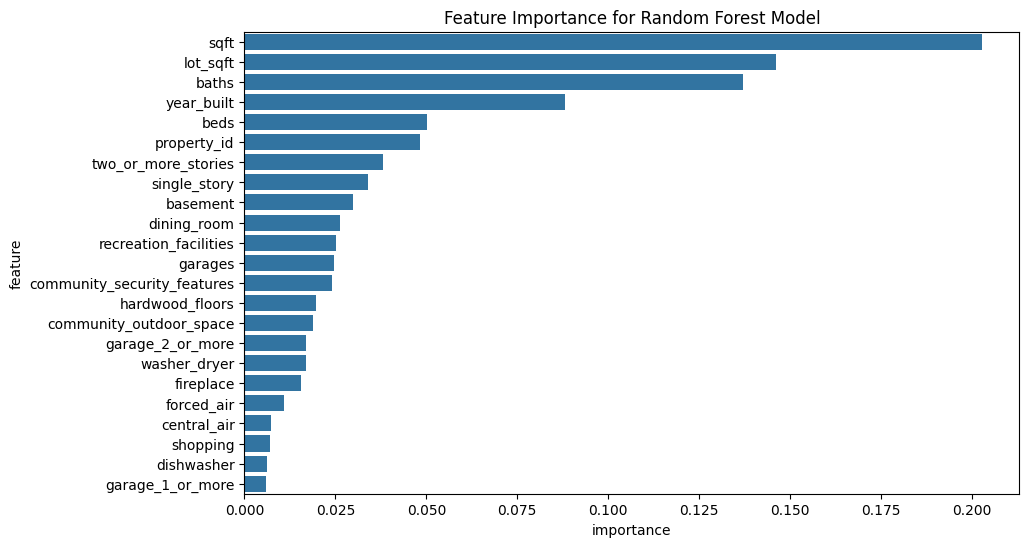

<Figure size 640x480 with 0 Axes>

In [63]:
#plot 
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Feature Importance for Random Forest Model')
plt.show()

plt.savefig('../images/feature_importance_rf.png')

The top features here are sqft, lot sqft, baths, year_built and bedrooms. These top features make sense for the model. 

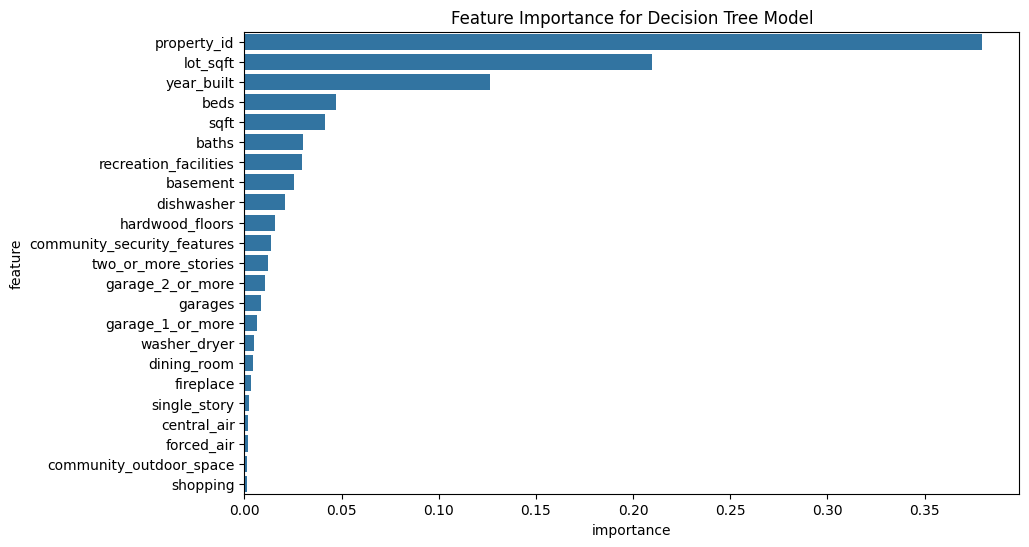

<Figure size 640x480 with 0 Axes>

In [66]:
#plot feature importance for decision tree
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_df_dt)
plt.title('Feature Importance for Decision Tree Model')
plt.show()

plt.savefig('../images/feature_importance_dt.png')

The top features here are quite interesting! First, we see that the top feature is property ID which suggests that maybe there must have been an inherent order to the IDs when the data was queried, giving higher house prices the top IDs. SQFT seems to be at the 5th spot, which is strange as it is usually an important predictor in house prices. 

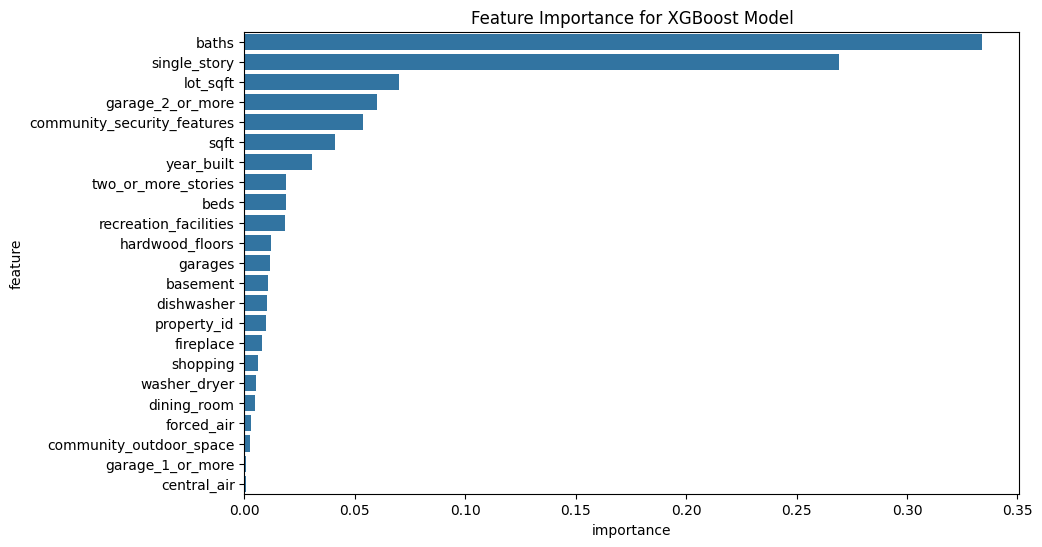

In [68]:
#Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_df_xgb)
plt.title('Feature Importance for XGBoost Model')
plt.show()

This model also has very interesting results as the BATHS seem to be the most important feature. For example, houses with more bathrooms are likely to be predicted as more expensive. 

In [74]:
# #Feature selection for Decision Tree
# model_dt_selected = DecisionTreeRegressor(**best_hyperparameters_dt_no_city, random_state=42)

# #Selecting top 10 features
# selector = SelectFromModel(model_dt_selected, max_features=10)
# X_train_selected = selector.fit_transform(X_train_no_city, Y_train_no_city)
# X_val_selected = selector.transform(X_val_no_city)

# #Fit the model
# model_dt_selected.fit(X_train_selected, Y_train_no_city)
# preds_dt_selected = model_dt_selected.predict(X_val_selected)

# #Metrics
# mse_dt_selected = mean_squared_error(Y_val_no_city, preds_dt_selected)
# mae_dt_selected = mean_absolute_error(Y_val_no_city, preds_dt_selected)
# r2_dt_selected = r2_score(Y_val_no_city, preds_dt_selected)

# print("Decision Tree Model Performance with Feature Selection")
# print(f"MSE for Decision Tree: {mse_dt_selected}")
# print(f"MAE for Decision Tree: {mae_dt_selected}")
# print(f"R^2 for Decision Tree: {r2_dt_selected}")


Decision Tree Model Performance with Feature Selection
MSE for Decision Tree: 27788646562.4382
MAE for Decision Tree: 18807.63920099875
R^2 for Decision Tree: 0.9092518717626247


In [75]:
model_dt_selected = DecisionTreeRegressor(**best_hyperparameters_dt_no_city, random_state=42)
top_10_features = feature_df_dt['feature'][:10].values
X_train_top_10 = X_train_no_city[top_10_features]
X_val_top_10 = X_val_no_city[top_10_features]

model_dt_selected.fit(X_train_top_10, Y_train_no_city)
preds_dt_top_10 = model_dt_selected.predict(X_val_top_10)

mse_dt_top_10 = mean_squared_error(Y_val_no_city, preds_dt_top_10)
mae_dt_top_10 = mean_absolute_error(Y_val_no_city, preds_dt_top_10)
r2_dt_top_10 = r2_score(Y_val_no_city, preds_dt_top_10)

print("Decision Tree Model Performance with Top 10 Features")
print(f"MSE for Decision Tree: {mse_dt_top_10}")
print(f"MAE for Decision Tree: {mae_dt_top_10}")
print(f"R^2 for Decision Tree: {r2_dt_top_10}")


Decision Tree Model Performance with Top 10 Features
MSE for Decision Tree: 3266021558.9413233
MAE for Decision Tree: 7855.857677902622
R^2 for Decision Tree: 0.9893343008774863


In [71]:
#Feature selecting for random forest 
model_selected = RandomForestRegressor(**best_hyperparameters_rf_no_city, random_state=42)
#Selecting the top 10 features
top_10_features = feature_df['feature'][:10].values
X_train_top_10 = X_train_no_city[top_10_features]
X_val_top_10 = X_val_no_city[top_10_features]

model_selected.fit(X_train_top_10, Y_train_no_city)
preds_selected = model_selected.predict(X_val_top_10)

mse_selected = mean_squared_error(Y_val_no_city, preds_selected)
mae_selected = mean_absolute_error(Y_val_no_city, preds_selected)
r2_selected = r2_score(Y_val_no_city, preds_selected)

print("Random Forest Model Performance with Top 10 Features")
print(f"MSE for Random Forest: {mse_selected}")
print(f"MAE for Random Forest: {mae_selected}")
print(f"R^2 for Random Forest: {r2_selected}")




Random Forest Model Performance with Top 10 Features
MSE for Random Forest: 4906240941.32175
MAE for Random Forest: 22411.311335830214
R^2 for Random Forest: 0.9839779105072233


In [ ]:
# Build pipeline here (ideal)

For the pipeline here, I decided to work from 'scratch' and used Standard Scaler and OneHotEncoder in the final pipeline. 

In [76]:
#Import data (from first split in eda)
X_train = pd.read_csv('../data/dataframes/X_train.csv')
X_test = pd.read_csv('../data/dataframes/X_test.csv')
Y_train = pd.read_csv('../data/dataframes/Y_train.csv')
Y_test = pd.read_csv('../data/dataframes/Y_test.csv')


In [78]:
X_train.drop(columns=['permalink', 'listing', 'primary_photo', 'state', 'postal_code', 'sold_date'], inplace=True)
X_test.drop(columns=['permalink', 'listing', 'primary_photo', 'state', 'postal_code', 'sold_date'], inplace=True)

In [79]:
X_train.columns

Index(['year_built', 'property_id', 'lot_sqft', 'sqft', 'baths', 'garages',
       'beds', 'city', 'recreation_facilities', 'single_story',
       'garage_1_or_more', 'hardwood_floors', 'dining_room',
       'community_security_features', 'garage_2_or_more',
       'two_or_more_stories', 'forced_air', 'shopping', 'central_air',
       'basement', 'community_outdoor_space', 'dishwasher', 'fireplace',
       'washer_dryer'],
      dtype='object')

In [82]:
#Numerical features
numerical_features = ['beds', 'baths', 'sqft', 'lot_sqft', 'year_built', 'property_id','garages']
#Categorical features
categorical_features = ['city']

In [87]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=None, 
                                    max_features='sqrt',
                                    min_samples_leaf= 1, 
                                    min_samples_split=2, 
                                    random_state=42)) 
])

# Use pipeline to fit and transform data
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['beds', 'baths', 'sqft',
                                                   'lot_sqft', 'year_built',
                                                   'property_id', 'garages']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city'])])),
                ('model',
                 DecisionTreeRegressor(max_features='sqrt', random_state=42))])

In [89]:
#Save pipeline
joblib.dump(pipeline, '../models/final_pipeline.pkl')

['../models/final_pipeline.pkl']

In [88]:
predicitions = pipeline.predict(X_test)

mse = mean_squared_error(Y_test, predicitions)
mae = mean_absolute_error(Y_test, predicitions)
r2 = r2_score(Y_test, predicitions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 1675692946.6067865
MAE: 3342.864271457086
R^2: 0.9847648069167247


This pipeline lead to good results as the MAE and MSE were small and the R2 was sufficiently high (98%). 

Pipelines come from sklearn.  When a pipeline is pickled, all of the information in the pipeline is stored with it.  For example, if we were deploying a model, and we had fit a scaler on the training data, we would want the same, already fitted scaling object to transform the new data with.  This is all stored when the pipeline is pickled.
- save your final pipeline in your `models/` folder

In [ ]:
#Previous pipeline with target encoding has 0.77 r2 score
#This pipeline has 0.98 r2 score